In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("face_mimic_df.csv")

# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Group the data by the 'diagnosed' column
grouped = data.groupby("diagnosed")

# Separate the data into Class A and Class B
class_A_data = data[data['diagnosed'] == 0]
class_B_data = data[data['diagnosed'] == 1]

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])



Unnamed: 0    0
id            0
age           0
gender        0
diagnosed     0
AU_01_t12     0
AU_06_t12     0
AU_12_t12     0
AU_04_t13     0
AU_07_t13     0
AU_09_t13     0
AU_01_t14     0
AU_02_t14     0
AU_04_t14     0
dtype: int64


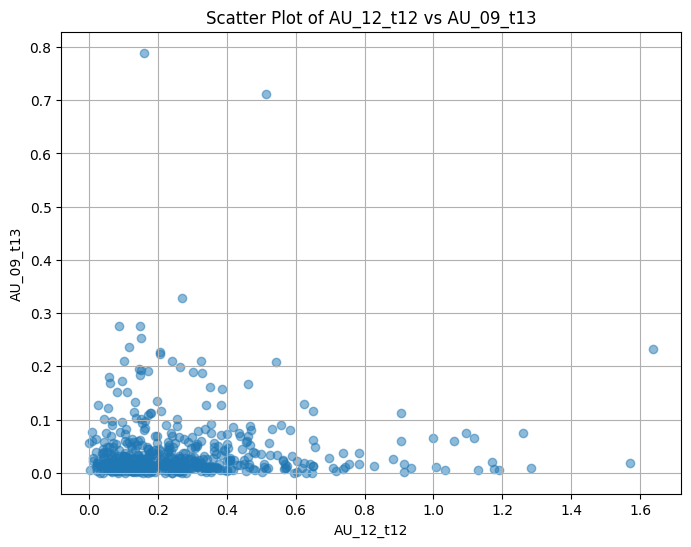

In [ ]:

# Select two numeric features for the scatter plot
feature1 = 'AU_12_t12'
feature2 = 'AU_09_t13'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['AU_12_t12'], data['AU_09_t13'], alpha=0.5)
plt.title(f'Scatter Plot of AU_12_t12 vs AU_09_t13')
plt.xlabel('AU_12_t12')
plt.ylabel('AU_09_t13')
plt.grid(True)
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Set the independent and dependent variables
X = data[['AU_12_t12']]  # Independent variable
y = data['AU_09_t13']  # Dependent variable

# Fit the model
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.004327122605150757


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train a Linear Regression model with your data (X and y)
model = LinearRegression()
model.fit(X, y)

# Access model attributes
intercept = model.intercept_  # Intercept (bias) term
coefficients = model.coef_  # Coefficients for each feature

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 0.03874368588730551
Coefficients: [0.00804359]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your project dataset and preprocess it as needed
# For binary classification, consider selecting two classes
X = data.drop("diagnosed", axis=1)
y = data["diagnosed"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a logistic regression classifier
logistic_model = LogisticRegression()

# Train the classifier on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")


Test Set Accuracy: 0.9134615384615384


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regressor on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Regression Tree): {mse}")


Mean Squared Error (Regression Tree): 0.006753976662185319


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a k-NN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the regressor on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (k-NN Regressor): {mse}")


Mean Squared Error (k-NN Regressor): 0.003608592250833902
